In [4]:
import pandas as pd
import numpy as np

# 1. Load the provided dataset and import in pandas DataFrame
print("=== Task 1: Loading Dataset ===")
df = pd.read_csv('bank.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print()

# 2. Check info of the DataFrame and identify required information
print("=== Task 2: DataFrame Information ===")
print("DataFrame Info:")
print(df.info())
print()

# 2(a) Columns with dtypes=object
print("2(a) Columns with dtypes=object:")
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)
print()

# 2(b) Unique values of those columns
print("2(b) Unique values of object columns:")
for col in object_columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values - {unique_vals}")
print()

# 2(c) Check for total number of null values in each column
print("2(c) Null values in each column:")
null_counts = df.isnull().sum()
print(null_counts)
print()

# 3. Drop all columns with dtypes object and store in new DataFrame
print("=== Task 3: Creating Numeric DataFrame ===")
df_numeric = df.select_dtypes(exclude=['object'])
print(f"Original DataFrame shape: {df.shape}")
print(f"Numeric DataFrame shape: {df_numeric.shape}")
print("Columns in numeric DataFrame:")
print(df_numeric.columns.tolist())

# Write the DataFrame to "banknumericdata.csv"
df_numeric.to_csv('banknumericdata.csv', index=False)
print("Numeric data saved to 'banknumericdata.csv'")
print()

# 4. Read "banknumericdata.csv" and find summary statistics
print("=== Task 4: Summary Statistics ===")
df_numeric_loaded = pd.read_csv('banknumericdata.csv')
print("Summary Statistics:")
print(df_numeric_loaded.describe())
print()

# Additional detailed statistics
print("Detailed Statistics:")
print(f"Dataset shape: {df_numeric_loaded.shape}")
print(f"Total numeric columns: {len(df_numeric_loaded.columns)}")
print(f"Column names: {df_numeric_loaded.columns.tolist()}")


=== Task 1: Loading Dataset ===
Dataset loaded successfully!
Dataset shape: (45211, 17)

=== Task 2: DataFrame Information ===
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes:

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('medical_students_dataset.csv')

# Display the first few rows
print("First 5 rows:")
print(df.head())

# Check info of the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Identify columns with missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows Count:")
print(df.duplicated().sum())

First 5 rows:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165230 entri

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Remove duplicates
df_cleaned = df.drop_duplicates()
print(f"Original shape: {df.shape}")
print(f"Shape after dropping duplicates: {df_cleaned.shape}")

# 2. Analyze distributions for numerical columns to decide on imputation
numerical_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']

# print descriptive statistics to see mean vs median (50%)
print("\nDescriptive Statistics for Numerical Columns:")
print(df_cleaned[numerical_cols].describe())

# 3. Analyze categorical columns for Mode
categorical_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
print("\nMode for Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].mode()[0]}")
    print(df_cleaned[col].value_counts(dropna=False)) # Show counts including NaN to see distribution

# Check Student ID pattern
print("\nStudent ID head:")
print(df_cleaned['Student ID'].head(10))

Original shape: (165230, 13)
Shape after dropping duplicates: (160208, 13)

Descriptive Statistics for Numerical Columns:
                 Age         Height         Weight            BMI  \
count  143859.000000  143736.000000  143797.000000  143691.000000   
mean       26.020409     174.942461      69.963839      23.341093   
std         4.894309      14.448209      17.329414       7.040980   
min        18.000000     150.000329      40.000578      10.074837   
25%        22.000000     162.432035      54.943755      17.853810   
50%        26.000000     174.906134      69.958459      22.668813   
75%        30.000000     187.445994      84.982261      28.001525   
max        34.000000     199.998639      99.999907      44.355113   

         Temperature     Heart Rate  Blood Pressure    Cholesterol  
count  143786.000000  143691.000000   143670.000000  143683.000000  
mean       98.600830      79.495097      114.552579     184.546049  
std         0.500415      11.538413       14.4028

In [7]:
# Imputation

# 1. Student ID - Interpolation
# Since it seems to be a simple sequence, interpolation is best.
df_cleaned['Student ID'] = df_cleaned['Student ID'].interpolate(method='linear')

# 2. Numerical Columns - Mean/Median
# Defining the strategy dictionary for clarity
imputation_strategies = {
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'BMI': 'median',
    'Temperature': 'mean',
    'Heart Rate': 'mean',
    'Blood Pressure': 'mean',
    'Cholesterol': 'mean'
}

for col, strategy in imputation_strategies.items():
    if strategy == 'mean':
        fill_value = df_cleaned[col].mean()
    else:
        fill_value = df_cleaned[col].median()

    df_cleaned[col] = df_cleaned[col].fillna(fill_value)


# 3. Categorical Columns - Mode
categorical_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

for col in categorical_cols:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col] = df_cleaned[col].fillna(mode_value)

# Final Check
print("Missing values after imputation:")
print(df_cleaned.isnull().sum())

# Check shape
print(f"Final Data Shape: {df_cleaned.shape}")

print(df_cleaned.head())

/tmp/ipython-input-693640188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Student ID'] = df_cleaned['Student ID'].interpolate(method='linear')
/tmp/ipython-input-693640188.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(fill_value)
/tmp/ipython-input-693640188.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Missing values after imputation:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64
Final Data Shape: (160208, 13)
   Student ID        Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.000000  Female  161.777924  72.354947          O  27.645835   
1         2.0  26.020409    Male  152.069157  47.630941          B  22.668813   
2         3.0  32.000000  Female  182.537664  55.741083          A  16.729017   
3         4.0  30.000000    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.000000  Female  174.942461  46.234173          O  22.668813   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0    98.600830        95.0      109.000000        203.0       No      No  
1    98.714977        93.0

Fare Statistics (Pclass 1):
 mean     84.154687
50%      60.287500
max     512.329200
min       0.000000
Name: Fare, dtype: float64

Null values in Age: 30

Modified DataFrame Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked C  Embarked Q  Embarked S  
0      0         A/5 21171   7.2500   NaN       False    

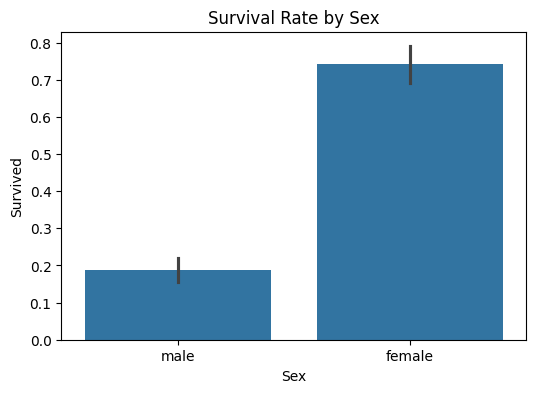

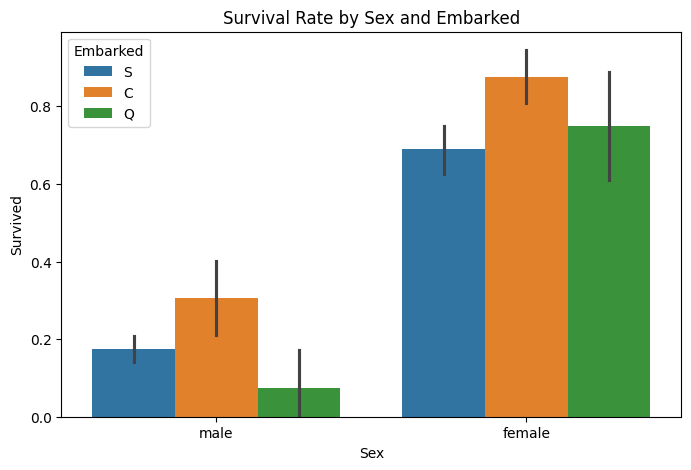

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# --- Problem 1 ---
# Create subset for Pclass 1
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df_pclass1 = df_subset[df_subset['Pclass'] == 1]

# Calculate Fare statistics
fare_stats = df_pclass1['Fare'].describe()[['mean', '50%', 'max', 'min']]
print("Fare Statistics (Pclass 1):\n", fare_stats)

# --- Problem 2 ---
# Check and drop nulls in Age
null_age = df_pclass1['Age'].isnull().sum()
print(f"\nNull values in Age: {null_age}")
df_pclass1_clean = df_pclass1.dropna(subset=['Age'])

# --- Problem 3 ---
# One-hot encoding Embarked on the main dataframe
dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
dummies.columns = [col.replace('_', ' ') for col in dummies.columns]
df_encoded = pd.concat([df, dummies], axis=1).drop('Embarked', axis=1)
print("\nModified DataFrame Head:\n", df_encoded.head())

# --- Problem 4 ---
# Plot Survival by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.savefig('survival_by_sex.png')

# --- Problem 5 ---
# Plot Survival by Sex and Embarked
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Sex and Embarked')
plt.savefig('survival_by_sex_embarked.png')